## Rental Bikes Analysis
### Problem Defintion
1. We have a dataset with all data of rentedbikescount depends some features.
2. Dataset features
   * **datetime** hourly date + timestamp  
   * **season** spring, summer, fall, winter 
   * **holiday** whether the day is considered a holiday
   * **workingday** whether the day is neither a weekend nor holiday
   * **weather** Clear, Mist, Rain, Snow
   * **temp** temperature in Celsius
   * **humidity** relative humidity
   * **windspeed** wind speed
   * **casual** number of non-registered user rentals initiated
   * **registered** number of registered user rentals initiated
   * **count** number of total rentals 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale = 1.2)

### Read Dataset

In [2]:
df = pd.read_csv('D:\Study\Courses\ML\Eplision\My Data Science Projects\Rental Bikes Analysis\Bikes.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,Spring,0,0,Clear,9.84,81,0.0,3,13,16
1,1/1/2011 1:00,Spring,0,0,Clear,9.02,80,0.0,8,32,40
2,1/1/2011 2:00,Spring,0,0,Clear,9.02,80,0.0,5,27,32
3,1/1/2011 3:00,Spring,0,0,Clear,9.84,75,0.0,3,10,13
4,1/1/2011 4:00,Spring,0,0,Clear,9.84,75,0.0,0,1,1


### Data Analysis
**Questions**

1. Make the Profit Feature
   - Each registered user rent bike for 5 USD/hour.
   - Each casual user rent bike for 20 USD/hour.
   - Taxes 0.14%.
   - Maintance 1500/year.
2. Distribution Rental Bikes Count & Profit.
3. Profit for each day of week.
4. Which season has more registeration & profit.
5. Which weather condition that has more registeration & profit.
6. Correlation between profit & rental bikes count with all features.
7. Rentals & profit during rush hours (7-9 am & 15-17 pm).
8. Rentals & profit during workingday.
9. Registered or Causal is more.
10. Schools (9-12) & (2-6) profit.
11. Profit in year 2011 & saturdays & fall season
    - Max profit
    - Min profit
    - Mean profit
    - Sum profit

#### Make the Profit Feature

In [3]:
def calc_profit(values):
    profit_cash = (values['casual'] * 20 + values['registered'] * 5)
    profit_with_taxes = profit_cash - (profit_cash * 0.14)
    final_profit = profit_with_taxes - (1500 / (365*24)) # To get maintance per hour
    return final_profit

df['profit'] = df[['casual', 'registered']].apply(calc_profit, axis = 1)
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,profit
0,1/1/2011 0:00,Spring,0,0,Clear,9.84,81,0.0,3,13,16,107.328767
1,1/1/2011 1:00,Spring,0,0,Clear,9.02,80,0.0,8,32,40,275.028767
2,1/1/2011 2:00,Spring,0,0,Clear,9.02,80,0.0,5,27,32,201.928767
3,1/1/2011 3:00,Spring,0,0,Clear,9.84,75,0.0,3,10,13,94.428767
4,1/1/2011 4:00,Spring,0,0,Clear,9.84,75,0.0,0,1,1,4.128767


In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,profit
0,1/1/2011 0:00,Spring,0,0,Clear,9.84,81,0.0,3,13,16,107.328767
1,1/1/2011 1:00,Spring,0,0,Clear,9.02,80,0.0,8,32,40,275.028767
2,1/1/2011 2:00,Spring,0,0,Clear,9.02,80,0.0,5,27,32,201.928767
3,1/1/2011 3:00,Spring,0,0,Clear,9.84,75,0.0,3,10,13,94.428767
4,1/1/2011 4:00,Spring,0,0,Clear,9.84,75,0.0,0,1,1,4.128767


#### Distribution Rental Bikes Count & Profit

In [5]:
df['count'].describe() # Rented bikes count dist

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [6]:
# Get record with max rented bikes count
df[df['count'] == df['count'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,profit
9345,9/12/2012 18:00,Fall,0,1,Clear,27.06,44,16.9979,91,886,977,5374.828767


In [7]:
df['profit'].describe() # Profit dist

count    10886.000000
mean      1288.280751
std       1309.683400
min          4.128767
25%        253.528767
50%        889.928767
75%       1891.828767
max       7881.728767
Name: profit, dtype: float64

In [8]:
# Get record with max profit
df[df['profit'] == df['profit'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,profit
9415,9/15/2012 16:00,Fall,0,0,Mist,27.06,36,15.0013,350,433,783,7881.728767


**Notes:** As we noticed the 2 records are different because in the max profit record No. of casuals more than casual in 
           the max renatl bike count record. 
           So the profit in the second record highest than first record.

#### Profit for each day of week

**Note:** We need to groupby day and we doesn't have such column, so we need to extract from datetime column day feature.

In [9]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,profit
0,1/1/2011 0:00,Spring,0,0,Clear,9.84,81,0.0000,3,13,16,107.328767
1,1/1/2011 1:00,Spring,0,0,Clear,9.02,80,0.0000,8,32,40,275.028767
2,1/1/2011 2:00,Spring,0,0,Clear,9.02,80,0.0000,5,27,32,201.928767
3,1/1/2011 3:00,Spring,0,0,Clear,9.84,75,0.0000,3,10,13,94.428767
4,1/1/2011 4:00,Spring,0,0,Clear,9.84,75,0.0000,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,Winter,0,1,Clear,15.58,50,26.0027,7,329,336,1534.928767
10882,12/19/2012 20:00,Winter,0,1,Clear,14.76,57,15.0013,10,231,241,1165.128767
10883,12/19/2012 21:00,Winter,0,1,Clear,13.94,61,15.0013,4,164,168,773.828767
10884,12/19/2012 22:00,Winter,0,1,Clear,13.94,61,6.0032,12,117,129,709.328767


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  profit      10886 non-null  float64
dtypes: float64(3), int64(6), object(3)
memory usage: 1020.7+ KB


**Note:** The datetime feature is object, so we need to convert this column to datetime

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   casual      10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  count       10886 non-null  int64         
 11  profit      10886 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 1020.7+ KB


**Note:** Now datetime feature is datetime type not object.

In [12]:
df['year'] = df['datetime'].dt.year
df['month_name'] = df['datetime'].dt.month_name()
df['month'] = df['datetime'].dt.month
df['day_name'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,profit,year,month_name,month,day_name,hour
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,81,0.0,3,13,16,107.328767,2011,January,1,Saturday,0
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,80,0.0,8,32,40,275.028767,2011,January,1,Saturday,1
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,80,0.0,5,27,32,201.928767,2011,January,1,Saturday,2
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,75,0.0,3,10,13,94.428767,2011,January,1,Saturday,3
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,75,0.0,0,1,1,4.128767,2011,January,1,Saturday,4


In [13]:
# 
df.groupby('day_name').mean()[['count', 'profit']].T

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,197.844343,190.390716,196.665404,180.839772,197.296201,189.723847,188.411348
profit,1250.484751,1203.496079,1666.252504,1513.401535,1157.893803,1112.073082,1100.526188


**Note:** 
* We found that mean count of bikes rented in Friday, but the mean profit of day in Saturday, So the job owner should focus on Saturday. 
* And the profit in Saturday greater than Wednesday despit the count of rented bikes in Wednesday much more cuz the casual and registered.

#### Which season has more registeration & profit.

In [14]:
# df.groupby('season').describe()[['count', 'profit']].T
df.groupby('season').mean()[['count', 'profit']].T

season,Fall,Spring,Summer,Winter
count,234.417124,116.343261,215.251372,198.988296
profit,1681.463893,699.920316,1537.472894,1224.171196


**Note:** We found that max count of bikes rented in Fall, and the Fall profit of season also in Fall, So the job owner should focus on Fall. 

#### Which weather condition that has more registeration & profit.

In [15]:
df.groupby('weather').describe()[['count', 'profit']].T

weather             Clear         Mist         Rain        Snow
count  count  7192.000000  2834.000000   859.000000    1.000000
       mean    205.236791   178.955540   118.846333  164.000000
       std     187.959566   168.366413   138.581297         NaN
       min       1.000000     1.000000     1.000000  164.000000
       25%      48.000000    41.000000    23.000000  164.000000
       50%     161.000000   134.000000    71.000000  164.000000
       75%     305.000000   264.000000   161.000000  164.000000
       max     977.000000   890.000000   891.000000  164.000000
profit count  7192.000000  2834.000000   859.000000    1.000000
       mean   1402.328892  1166.470052   735.874634  782.428767
       std    1381.640444  1159.674508   925.977295         NaN
       min       4.128767     4.128767     4.128767  782.428767
       25%     287.928767   244.928767   124.528767  782.428767
       50%    1014.628767   825.428767   399.728767  782.428767
       75%    2055.228767  1745.628767   956.578767  782.428767
       max    7864.528767  7881.728767  5542.528767  782.428767

**Note:** From above analysis we found that when the weather is clear the most profit and most rented bikes.

#### Correlation between profit & rental bikes count with all features.

In [16]:
df.corr()[['count', 'profit']]

,count,profit
holiday,-0.005393,0.018346
workingday,0.011594,-0.150138
temp,0.394454,0.464454
humidity,-0.317371,-0.360095
windspeed,0.101369,0.105697
casual,0.690414,0.902713
registered,0.970948,0.822156
count,1.000000,0.934490
profit,0.934490,1.000000
year,0.260403,0.226345


<AxesSubplot:>

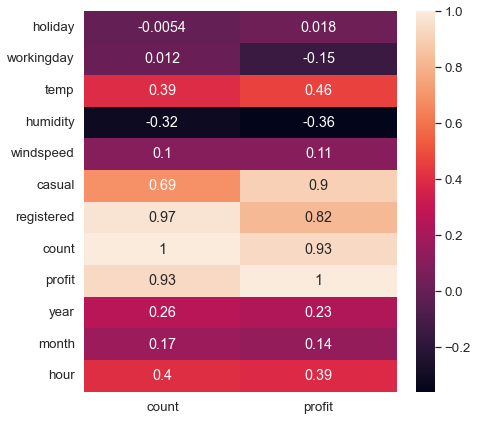

In [17]:
sns.heatmap(df.corr()[['count', 'profit']], annot=True)

**Note:** 
  - When temp increase the profit increase as well.
  - When humidity decrease the profit decrease as well.
  - No. of casual is more effective on profit than registered, because the casual rent for hour is 20 USD but registered 5 USD.

#### Rentals & profit during rush hours (7-9 am & 15-17 pm)

In [18]:
def calc_rush_hour(hour):
    return 1 if hour in [7,8,9,15,16,17] else 0
df['is_rush_hour'] = df['hour'].apply(calc_rush_hour)
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,profit,year,month_name,month,day_name,hour,is_rush_hour
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,81,0.0,3,13,16,107.328767,2011,January,1,Saturday,0,0
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,80,0.0,8,32,40,275.028767,2011,January,1,Saturday,1,0
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,80,0.0,5,27,32,201.928767,2011,January,1,Saturday,2,0
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,75,0.0,3,10,13,94.428767,2011,January,1,Saturday,3,0
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,75,0.0,0,1,1,4.128767,2011,January,1,Saturday,4,0


In [19]:
df.groupby('is_rush_hour').describe()[['count', 'profit']].T

is_rush_hour            0            1
count  count  8153.000000  2733.000000
       mean    153.140562   306.227955
       std     158.808647   194.740685
       min       1.000000     1.000000
       25%      26.000000   157.000000
       50%     108.000000   276.000000
       75%     225.000000   420.000000
       max     977.000000   970.000000
profit count  8153.000000  2733.000000
       mean   1069.674358  1940.420498
       std    1217.987206  1356.260623
       min       4.128767     4.128767
       25%     158.928767   937.228767
       50%     644.828767  1689.728767
       75%    1547.828767  2622.828767
       max    7864.528767  7881.728767

**Note:** The rush hour is very important on my profit and rental counts.

#### Rentals & profit during workingday.

In [20]:
df.groupby('workingday').describe()[['count', 'profit']].T

workingday              0            1
count  count  3474.000000  7412.000000
       mean    188.506621   193.011873
       std     173.724015   184.513659
       min       1.000000     1.000000
       25%      44.000000    41.000000
       50%     128.000000   151.000000
       75%     304.000000   277.000000
       max     783.000000   977.000000
profit count  3474.000000  7412.000000
       mean   1575.484179  1153.668675
       std    1657.985547  1083.659550
       min       4.128767     4.128767
       25%     283.628767   236.328767
       50%     887.778767   889.928767
       75%    2493.828767  1758.528767
       max    7881.728767  6338.028767

**Note:** 
  - We will found that the rent bikes is much more in workingdays, but the profit is more in non workingdays.
  - And that makes sense that the No. of causal people rent bikes in workingdays less than non workingdays.

#### Registered or Causal is more.

In [21]:
df.corr()[['count', 'profit']].loc[['casual', 'registered']]

,count,profit
casual,0.690414,0.902713
registered,0.970948,0.822156


**Notes:**
  - We found that the casual people is more effective on my profit than registered people.
  - That leads us to:
    - We need to focus on increaseing No. of casual people to get more profit.
    - And we could increase the money for registered so that count of registered people affect the profit more.

#### Schools (9-12) & (2-6) profit.

In [22]:
def calc_school_month(month):
    return 1 if month in ['September', 'October', 'November', 'December', 'February', 'March', 'April', 'May', 'June'] else 0
df['is_school'] = df['month_name'].apply(calc_school_month)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,profit,year,month_name,month,day_name,hour,is_rush_hour,is_school
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,81,0.0000,3,13,16,107.328767,2011,January,1,Saturday,0,0,0
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,80,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1,0,0
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,80,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2,0,0
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,75,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3,0,0
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,75,0.0000,0,1,1,4.128767,2011,January,1,Saturday,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,50,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19,0,1
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,57,15.0013,10,231,241,1165.128767,2012,December,12,Wednesday,20,0,1
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,61,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21,0,1
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,61,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22,0,1


In [23]:
df.groupby('is_school').describe()[['count', 'profit']].T

is_school               0            1
count  count  2708.000000  8178.000000
       mean    187.598597   192.890560
       std     179.258377   181.756401
       min       1.000000     1.000000
       25%      40.000000    44.000000
       50%     139.000000   147.000000
       75%     282.000000   284.000000
       max     897.000000   977.000000
profit count  2708.000000  8178.000000
       mean   1302.252401  1283.654287
       std    1290.751798  1315.937715
       min       4.128767     4.128767
       25%     240.628767   257.828767
       50%     881.328767   894.228767
       75%    2038.028767  1848.828767
       max    6497.128767  7881.728767

**Note:** 
  - The count of rented bikes in months not school is more than others, but the profit in school months is much more.
  - But the range is not so big.

#### Profit in year 2011 & saturdays & fall season
    - Max profit
    - Min profit
    - Mean profit
    - Sum profit

In [24]:
data = df[ (df['year'] == 2011) & (df['day_name'] == 'Saturday') & (df['season'] == 'Fall') ]
print("Max:\n", data[['count', 'profit']].max())
print("Min:\n", data[['count', 'profit']].min())
print("Mean:\n", data[['count', 'profit']].mean())
print("Sum:\n", data[['count', 'profit']].sum())

Max:
 count      497.000000
profit    5060.928767
dtype: float64
Min:
 count      5.000000
profit    25.628767
dtype: float64
Mean:
 count      203.968750
profit    1868.178767
dtype: float64
Sum:
 count      39162.000000
profit    358690.323288
dtype: float64


### Data Visualization
**Types of visualization can be performed:**
  1. Numerical Features (Univariate - Bivariate):
     - temp
     - humidity
     - windspeed     
     - casual        
     - registered    
     - count         
     - profit
  2. Categorical Features (Univariate - Bivariate): 
     - season 
     - holiday
     - workingday   
     - weather
     - is_rush_hour
     - is_school

#### Numerical Features (Univariate)

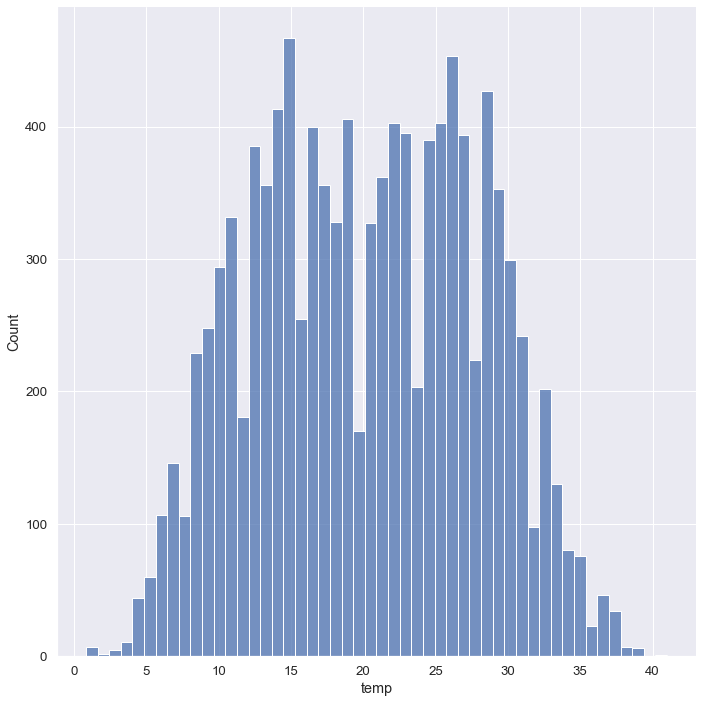

In [25]:
sns.displot(df['temp'], kde=False, height = 10, bins = 50)

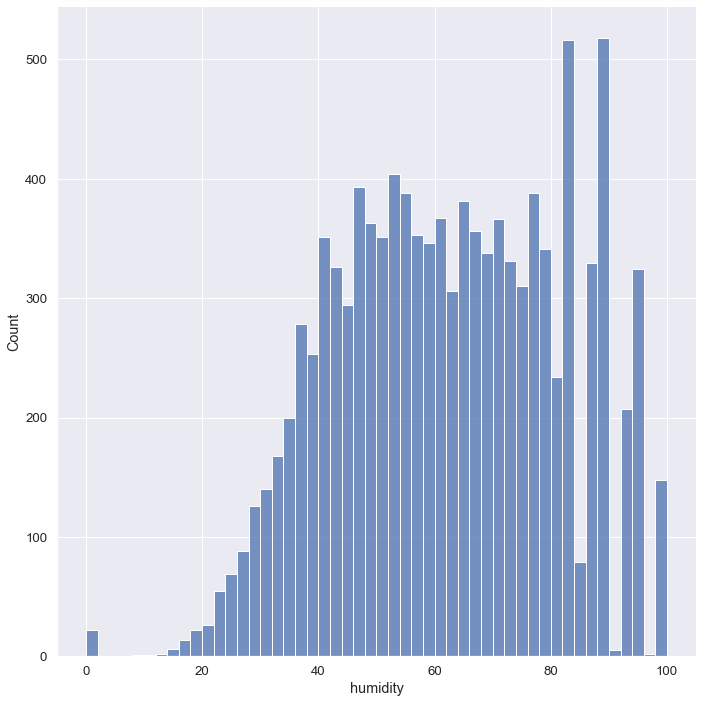

In [26]:
sns.displot(df['humidity'], kde=False, height = 10, bins = 50)

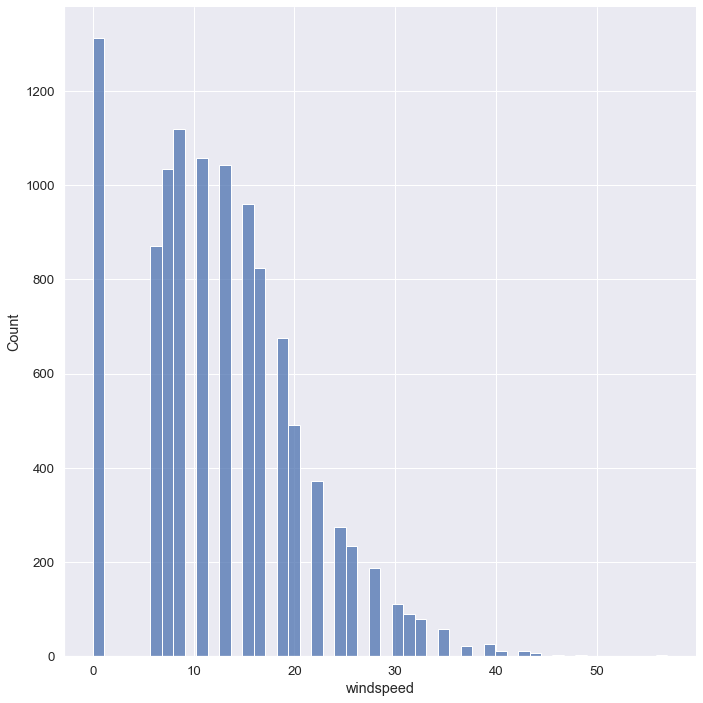

In [27]:
sns.displot(df['windspeed'], kde=False, height = 10, bins = 50)

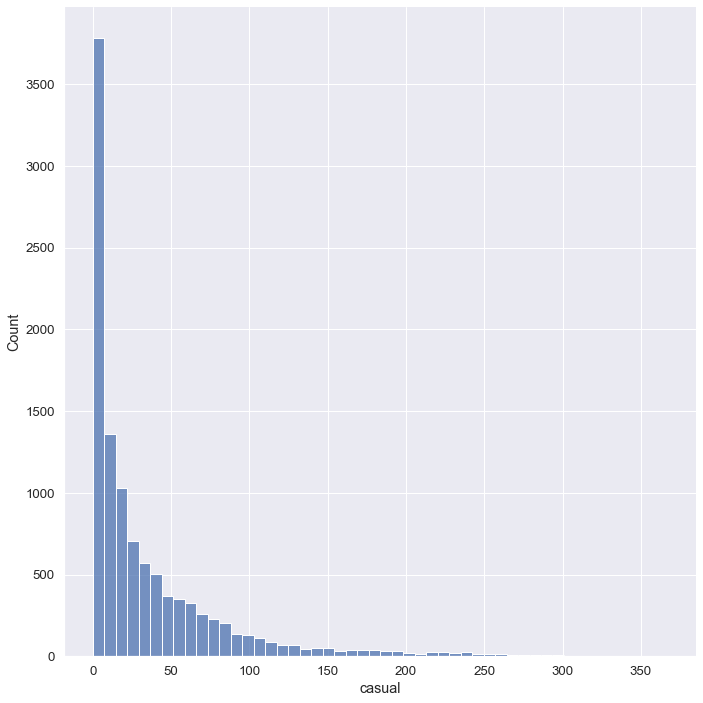

In [28]:
sns.displot(df['casual'], kde=False, height = 10, bins = 50)

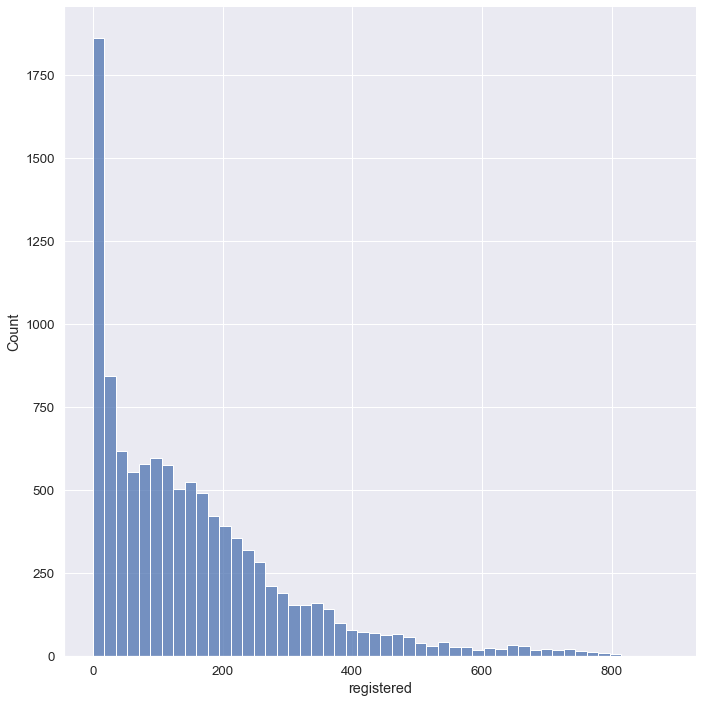

In [29]:
sns.displot(df['registered'], kde=False, height = 10, bins = 50)

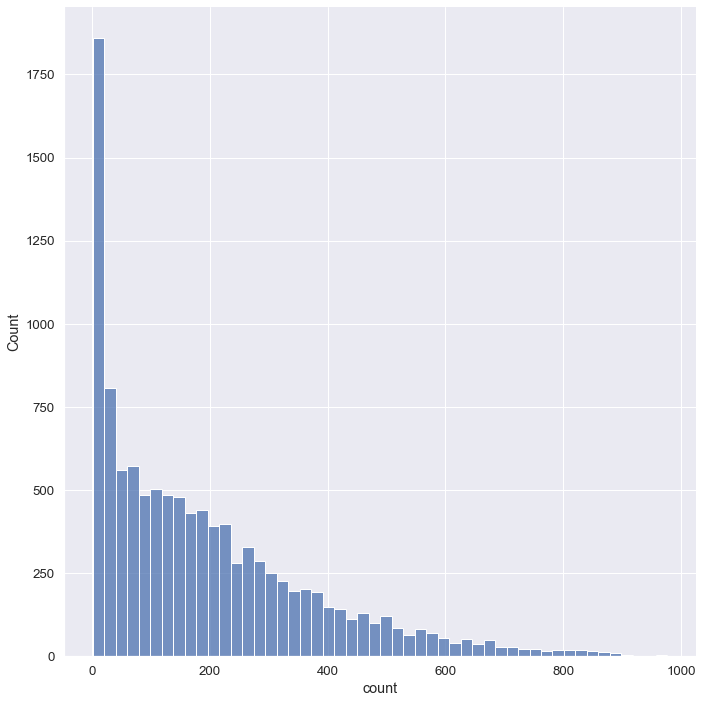

In [30]:
sns.displot(df['count'], kde=False, height = 10, bins = 50)

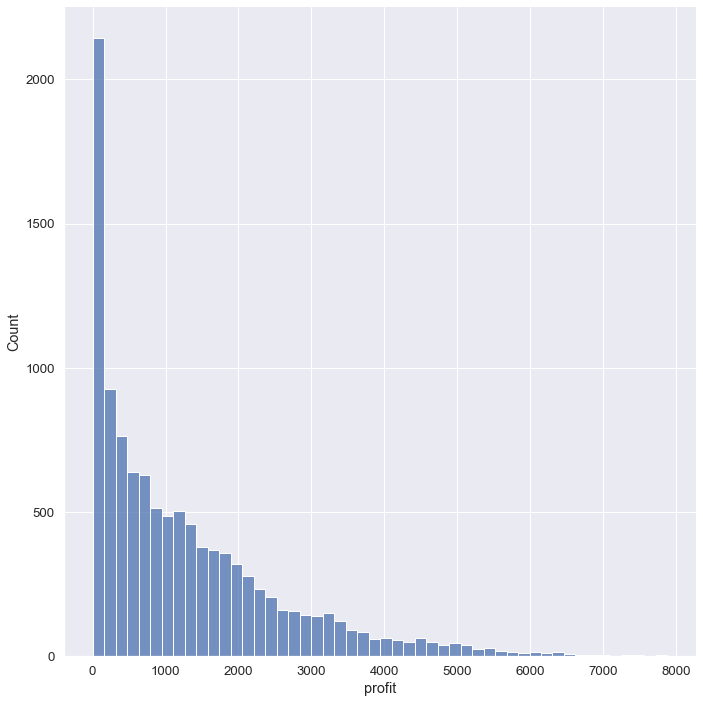

In [31]:
sns.displot(df['profit'], kde=False, height = 10, bins = 50)

#### Numerical Features (Bivariate)

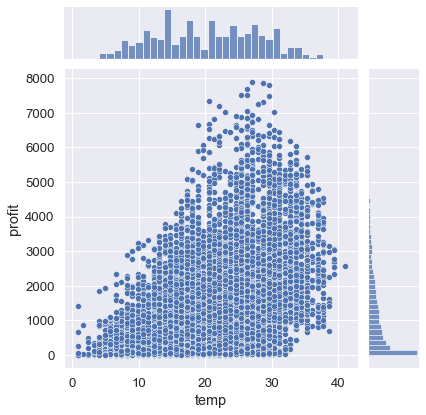

In [32]:
sns.jointplot(x = 'temp', y = 'profit', data = df)

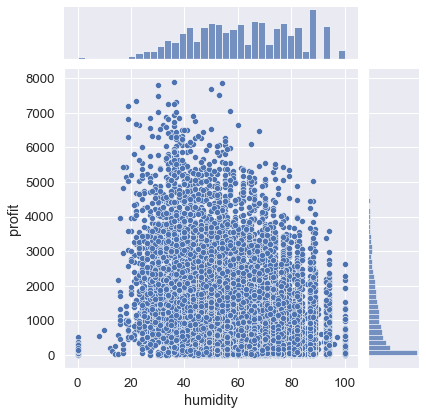

In [33]:
sns.jointplot(x = 'humidity', y = 'profit', data = df)

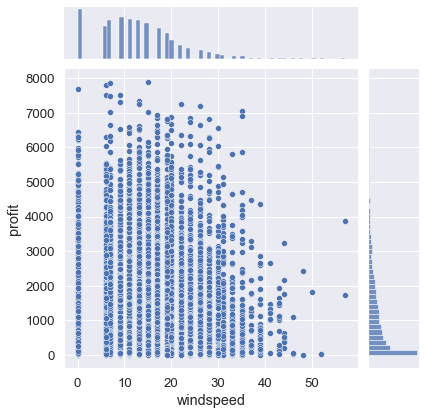

In [34]:
sns.jointplot(x = 'windspeed', y = 'profit', data = df)

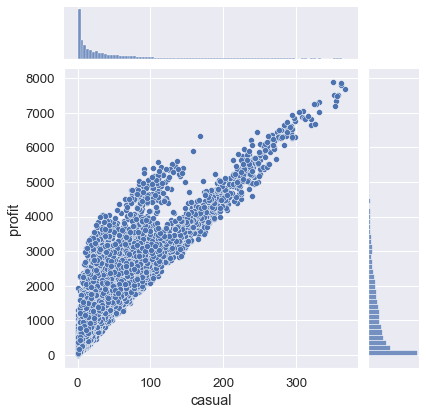

In [35]:
sns.jointplot(x = 'casual', y = 'profit', data = df)

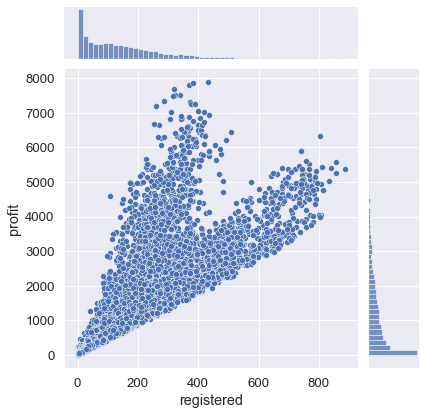

In [36]:
sns.jointplot(x = 'registered', y = 'profit', data = df)

#### Categorical Features (Univariate)

<AxesSubplot:xlabel='season', ylabel='count'>

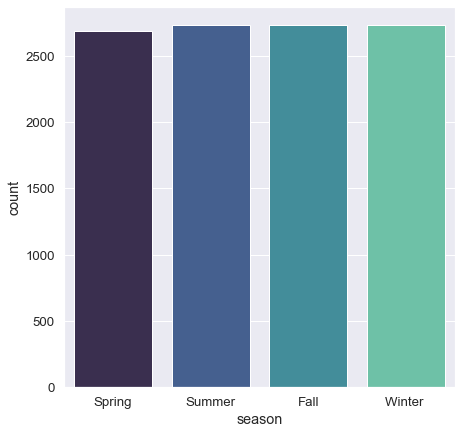

In [37]:
sns.countplot(x = 'season', data = df, palette='mako')

<AxesSubplot:xlabel='holiday', ylabel='count'>

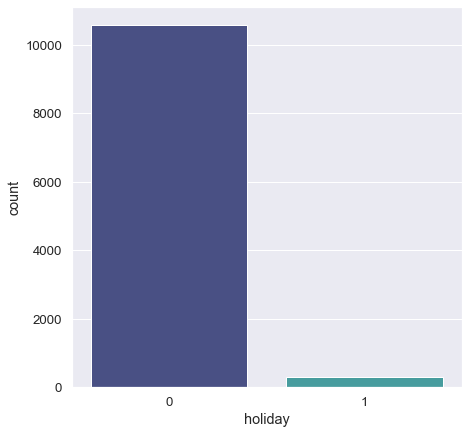

In [38]:
sns.countplot(x = 'holiday', data = df, palette='mako')

<AxesSubplot:xlabel='workingday', ylabel='count'>

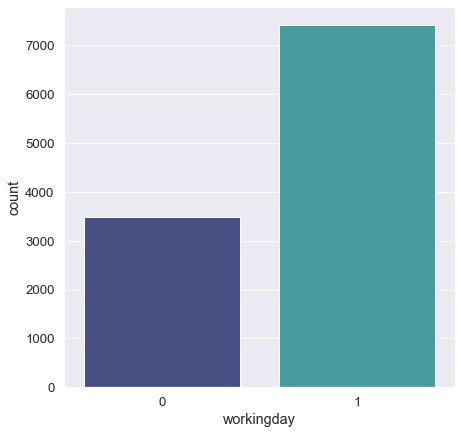

In [39]:
sns.countplot(x = 'workingday', data = df, palette='mako')

<AxesSubplot:xlabel='weather', ylabel='count'>

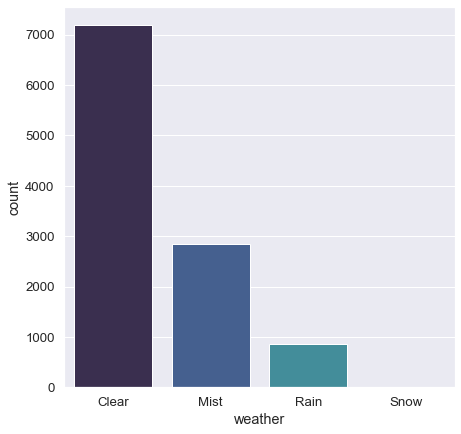

In [40]:
sns.countplot(x = 'weather', data = df, palette='mako')

<AxesSubplot:xlabel='is_rush_hour', ylabel='count'>

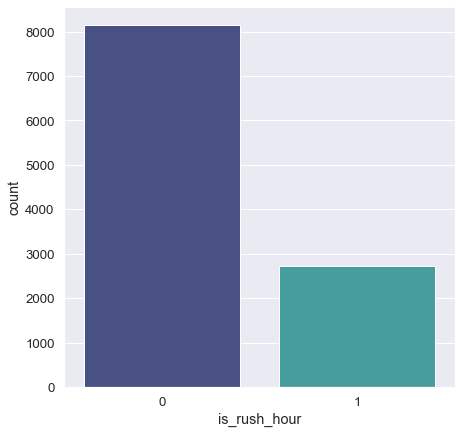

In [41]:
sns.countplot(x = 'is_rush_hour', data = df, palette='mako')

<AxesSubplot:xlabel='is_school', ylabel='count'>

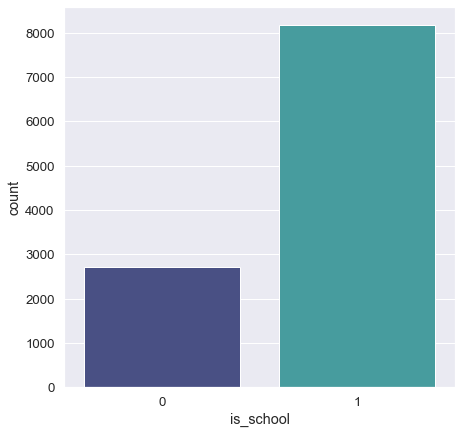

In [42]:
sns.countplot(x = 'is_school', data = df, palette='mako')

#### Categorical Features (Bivariate)

<AxesSubplot:xlabel='season', ylabel='profit'>

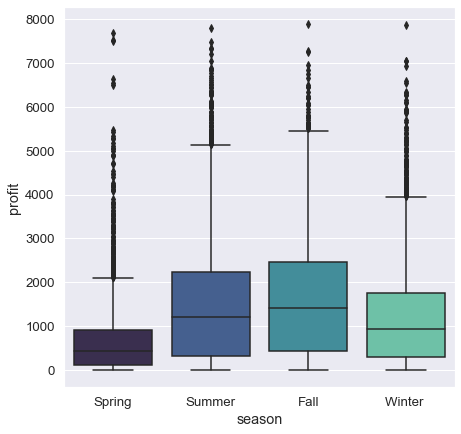

In [43]:
sns.boxplot(x = 'season', y = 'profit', data = df, palette='mako')

<AxesSubplot:xlabel='holiday', ylabel='profit'>

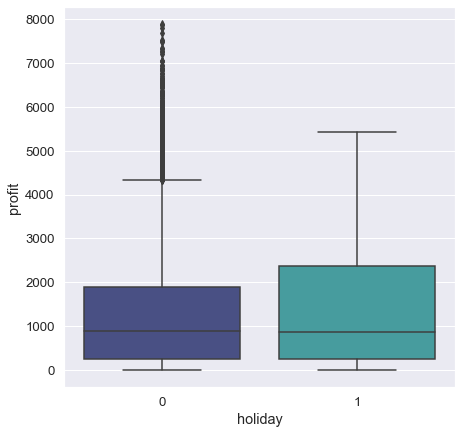

In [44]:
sns.boxplot(x = 'holiday', y = 'profit', data = df, palette='mako')

<AxesSubplot:xlabel='workingday', ylabel='profit'>

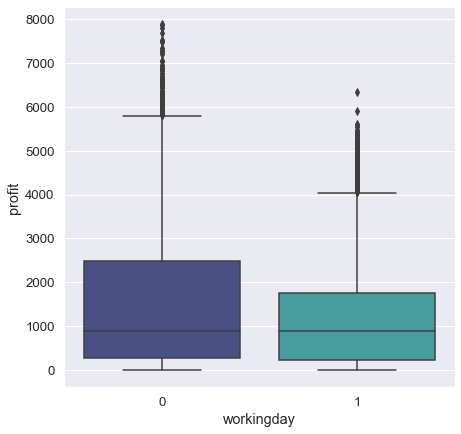

In [45]:
sns.boxplot(x = 'workingday', y = 'profit', data = df, palette='mako')

<AxesSubplot:xlabel='weather', ylabel='profit'>

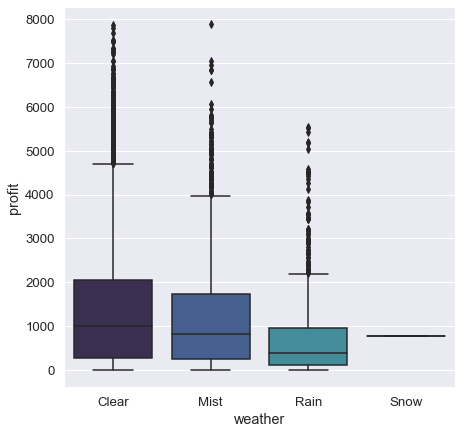

In [46]:
sns.boxplot(x = 'weather', y = 'profit', data = df, palette='mako')

<AxesSubplot:xlabel='is_rush_hour', ylabel='profit'>

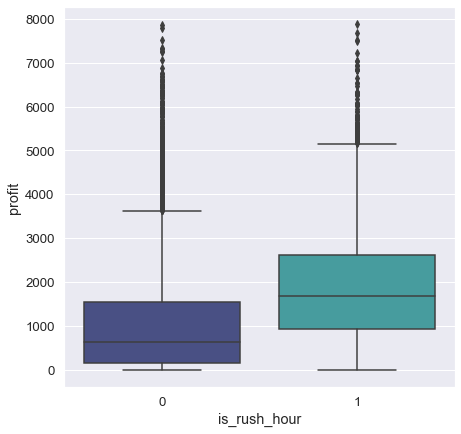

In [47]:
sns.boxplot(x = 'is_rush_hour', y = 'profit', data = df, palette='mako')

<AxesSubplot:xlabel='is_school', ylabel='profit'>

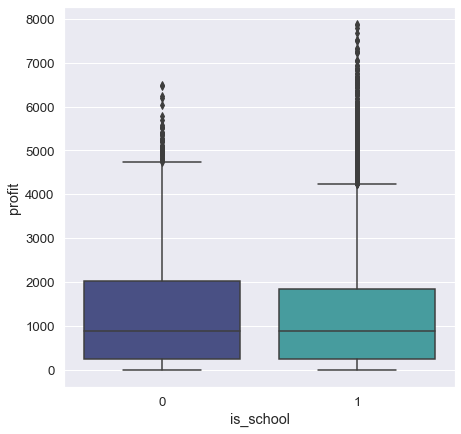

In [48]:
sns.boxplot(x = 'is_school', y = 'profit', data = df, palette='mako')

### Data preprocessing
- Data Cleaning 
- Working with missing values
- Working with categorical data
- Split data into train and test sets
- Feature scaling

### Data cleaning
**Numerical Features:**
- Make sure that numeric features is numeric by changing feature to numeric using to_numeric()
- Use describe() to search for logic values or to make sure that values are true

In [49]:
# First check numerical features is numeric or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  object        
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  object        
 5   temp          10886 non-null  float64       
 6   humidity      10886 non-null  int64         
 7   windspeed     10886 non-null  float64       
 8   casual        10886 non-null  int64         
 9   registered    10886 non-null  int64         
 10  count         10886 non-null  int64         
 11  profit        10886 non-null  float64       
 12  year          10886 non-null  int64         
 13  month_name    10886 non-null  object        
 14  month         10886 non-null  int64         
 15  day_name      10886 non-null  object

In [50]:
# If there is a problem use to_numeric() that non numeric features to numeric
for i in ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'profit']:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  object        
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  object        
 5   temp          10886 non-null  float64       
 6   humidity      10886 non-null  int64         
 7   windspeed     10886 non-null  float64       
 8   casual        10886 non-null  int64         
 9   registered    10886 non-null  int64         
 10  count         10886 non-null  int64         
 11  profit        10886 non-null  float64       
 12  year          10886 non-null  int64         
 13  month_name    10886 non-null  object        
 14  month         10886 non-null  int64         
 15  day_name      10886 non-null  object

In [52]:
# Describe data to search for logic error, that can accur in range of values maybe
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,count,profit,year,month,hour,is_rush_hour,is_school
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,61.886460,12.799395,36.021955,155.552177,191.574132,1288.280751,2011.501929,6.521495,11.541613,0.251056,0.751240
std,0.166599,0.466159,7.79159,19.245033,8.164537,49.960477,151.039033,181.144454,1309.683400,0.500019,3.444373,6.915838,0.433641,0.432314
min,0.000000,0.000000,0.82000,0.000000,0.000000,0.000000,0.000000,1.000000,4.128767,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,47.000000,7.001500,4.000000,36.000000,42.000000,253.528767,2011.000000,4.000000,6.000000,0.000000,1.000000
50%,0.000000,1.000000,20.50000,62.000000,12.998000,17.000000,118.000000,145.000000,889.928767,2012.000000,7.000000,12.000000,0.000000,1.000000
75%,0.000000,1.000000,26.24000,77.000000,16.997900,49.000000,222.000000,284.000000,1891.828767,2012.000000,10.000000,18.000000,1.000000,1.000000
max,1.000000,1.000000,41.00000,100.000000,56.996900,367.000000,886.000000,977.000000,7881.728767,2012.000000,12.000000,23.000000,1.000000,1.000000


**Categorical Features:**
- Use unique to check the categorical feature values

In [53]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'profit',
       'year', 'month_name', 'month', 'day_name', 'hour', 'is_rush_hour',
       'is_school'],
      dtype='object')

In [54]:
for col in ['season', 'holiday', 'workingday', 'weather', 'year', 'month_name', 'day_name', 'hour', 'is_rush_hour', 'is_school']:
    print(f'----------{col}----------')
    print(df[col].unique())
    print('==========================')

----------season----------
['Spring' 'Summer' 'Fall' 'Winter ']
----------holiday----------
[0 1]
----------workingday----------
[0 1]
----------weather----------
['Clear' 'Mist' 'Rain' 'Snow']
----------year----------
[2011 2012]
----------month_name----------
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------day_name----------
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
----------hour----------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
----------is_rush_hour----------
[0 1]
----------is_school----------
[0 1]


#### Check missing data

In [55]:
df.isna().sum()

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp            0
humidity        0
windspeed       0
casual          0
registered      0
count           0
profit          0
year            0
month_name      0
month           0
day_name        0
hour            0
is_rush_hour    0
is_school       0
dtype: int64

**Note:** No missing data in our dataset

#### Working with categorical data
**Two types of categorical data:**
- Ordinal (Have sorting properties)
- Nominal (Uses dummy variables)

In [56]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'profit',
       'year', 'month_name', 'month', 'day_name', 'hour', 'is_rush_hour',
       'is_school'],
      dtype='object')

In [57]:
df = df[['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'count', 'month', 'day_name', 'hour', 'profit']]
df

,season,holiday,workingday,weather,temp,humidity,count,month,day_name,hour,profit
0,Spring,0,0,Clear,9.84,81,16,1,Saturday,0,107.328767
1,Spring,0,0,Clear,9.02,80,40,1,Saturday,1,275.028767
2,Spring,0,0,Clear,9.02,80,32,1,Saturday,2,201.928767
3,Spring,0,0,Clear,9.84,75,13,1,Saturday,3,94.428767
4,Spring,0,0,Clear,9.84,75,1,1,Saturday,4,4.128767
...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,0,1,Clear,15.58,50,336,12,Wednesday,19,1534.928767
10882,Winter,0,1,Clear,14.76,57,241,12,Wednesday,20,1165.128767
10883,Winter,0,1,Clear,13.94,61,168,12,Wednesday,21,773.828767
10884,Winter,0,1,Clear,13.94,61,129,12,Wednesday,22,709.328767


In [58]:
df = pd.get_dummies(data = df, columns = ['season', 'weather', 'day_name'], drop_first=True)
df

,holiday,workingday,temp,humidity,count,month,hour,profit,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rain,weather_Snow,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,0,9.84,81,16,1,0,107.328767,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,9.02,80,40,1,1,275.028767,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,9.02,80,32,1,2,201.928767,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,9.84,75,13,1,3,94.428767,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,9.84,75,1,1,4,4.128767,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,336,12,19,1534.928767,0,0,1,0,0,0,0,0,0,0,0,1
10882,0,1,14.76,57,241,12,20,1165.128767,0,0,1,0,0,0,0,0,0,0,0,1
10883,0,1,13.94,61,168,12,21,773.828767,0,0,1,0,0,0,0,0,0,0,0,1
10884,0,1,13.94,61,129,12,22,709.328767,0,0,1,0,0,0,0,0,0,0,0,1


#### Split data into train and test sets


In [59]:
X = df.drop('profit', axis = 1)
y = df['profit']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#### Feature scaling

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Machine Learning

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [63]:
models = {
    "LR" : LinearRegression(),
    "KNNR" : KNeighborsRegressor(),
    "SVR" : SVR(),
    "DT" : DecisionTreeRegressor(),
    "RF" : RandomForestRegressor(),
    "XGBR" : XGBRegressor()
}

In [64]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train, y_train)
    print(f'Trainning Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    y_pred = model.predict(X_test)
    print(f'MSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('======================================================')

Using model: LR
Trainning Score: 0.9185591481488166
Test Score: 0.9187846664430072
MSE: 374.3615354420458
Using model: KNNR
Trainning Score: 0.9629734932597466
Test Score: 0.9379705959245404
MSE: 327.16814237829254
Using model: SVR
Trainning Score: 0.15208619673390866
Test Score: 0.13974221741745552
MSE: 1218.3905133892351
Using model: DT
Trainning Score: 0.9999999936155469
Test Score: 0.9704767923466462
MSE: 225.7116493392134
Using model: RF
Trainning Score: 0.9976170456912871
Test Score: 0.9848660704876593
MSE: 161.60249333385633
Using model: XGBR
Trainning Score: 0.9972505709490951
Test Score: 0.9868399713011414
MSE: 150.69561731068268
